In [1]:
import dask
from time import sleep

def inc(x):
    sleep(1)
    return x + 1

def add(x, y):
    sleep(1)
    return x + y 

In [2]:
%%time 

x = inc(1)
y = inc(2)
z = add(x, y)

print(x,y,z)

2 3 5
CPU times: user 5.29 ms, sys: 0 ns, total: 5.29 ms
Wall time: 3 s


In [3]:
@dask.delayed
def inc(x):
    sleep(1)
    return x + 1

@dask.delayed
def add(x, y):
    sleep(1)
    return x + y

In [4]:
%%time

x = inc(1)
y = inc(2)
z = add(x, y)

print(x,y,z) # just creates graph - does not perform computation

Delayed('inc-1bbebe67-b97f-4cdc-bbb6-66c7f9028829') Delayed('inc-109f9807-ae7d-4357-803d-1ad47354f015') Delayed('add-c12cdb5c-49c8-4f9f-9d76-e28f233cac2d')
CPU times: user 1.09 ms, sys: 177 µs, total: 1.27 ms
Wall time: 1e+03 µs


In [5]:
%%time 

x.compute()
y.compute()
z.compute()

CPU times: user 554 ms, sys: 615 ms, total: 1.17 s
Wall time: 4.43 s


5

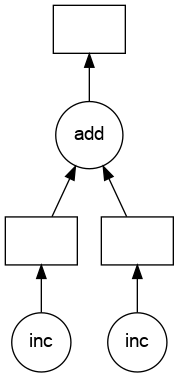

In [6]:
z.visualize()

In [10]:
data = [1,2,3,4,5,6,7,8]

In [11]:
%%time
# Sequential code


def inc(x):
    sleep(1)
    return x + 1


results = []
for x in data:
    y = inc(x)
    results.append(y)

total = sum(results)

CPU times: user 386 µs, sys: 4.96 ms, total: 5.35 ms
Wall time: 8.01 s


In [14]:
total

44

In [16]:
@dask.delayed
def inc(x):
    sleep(1)
    return x + 1


results = []
for x in data:
    y = inc(x)
    results.append(y)

total = sum(results)
print("Before computing:", total)  # Let's see what type of thing total is
result = total.compute()
print("After computing :", result)  # After it's computed

Before computing: Delayed('add-5764809ad536212b18d30b4d01d0d4c9')
After computing : 44


In [18]:
inc(1) + inc(2)

Delayed('add-58f9424682779b04177aca8db82df8f7')